##  üì¶ Day 4 - Product-Level Profitability and Sales Analysis üöÄ
We'll analyze which products, categories, and sub-categories contribute most to sales and profit.

### üì¶ Step 1: Load Cleaned Dataset

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv('../data/superstore_cleaned.csv')
df.head()

row_id  order_id  order_date order_priority  order_quantity       sales  \
0       1         3  10/13/2010            Low               6    261.5400   
1      49       293   10/1/2012           High              49  10123.0200   
2      50       293   10/1/2012           High              27    244.5700   
3      80       483   7/10/2011           High              30   4965.7595   
4      85       515   8/28/2010  Not Specified              19    394.2700   

   discount       ship_mode   profit  unit_price  ...       customer_name  \
0      0.04     Regular Air  -213.25       38.94  ...  Muhammed MacIntyre   
1      0.07  Delivery Truck   457.81      208.16  ...        Barry French   
2      0.01     Regular Air    46.71        8.69  ...        Barry French   
3      0.08     Regular Air  1198.97      195.99  ...       Clay Rozendal   
4      0.08     Regular Air    30.94       21.78  ...      Carlos Soltero   

  province   region customer_segment product_category  \
0  Nunavut  Nunavut   Small Business  Office Supplies   
1  Nunavut  Nunavut         Consumer  Office Supplies   
2  Nunavut  Nunavut         Consumer  Office Supplies   
3  Nunavut  Nunavut        Corporate       Technology   
4  Nunavut  Nunavut         Consumer  Office Supplies   

             product_sub-category  \
0          Storage & Organization   
1                      Appliances   
2  Binders and Binder Accessories   
3    Telephones and Communication   
4                      Appliances   

                                        product_name product_container  \
0   Eldon Base for stackable storage shelf, platinum         Large Box   
1  1.7 Cubic Foot Compact "Cube" Office Refrigera...        Jumbo Drum   
2   Cardinal Slant-D¬Æ Ring Binder, Heavy Gauge Vinyl         Small Box   
3                                               R380         Small Box   
4                           Holmes HEPA Air Purifier        Medium Box   

  product_base_margin   ship_date  
0                0.80  10/20/2010  
1                0.58   10/2/2012  
2                0.39   10/3/2012  
3                0.58   7/12/2011  
4                0.50   8/30/2010  

[5 rows x 21 columns]

### üìä Step 2: Sales & Profit by Product Category

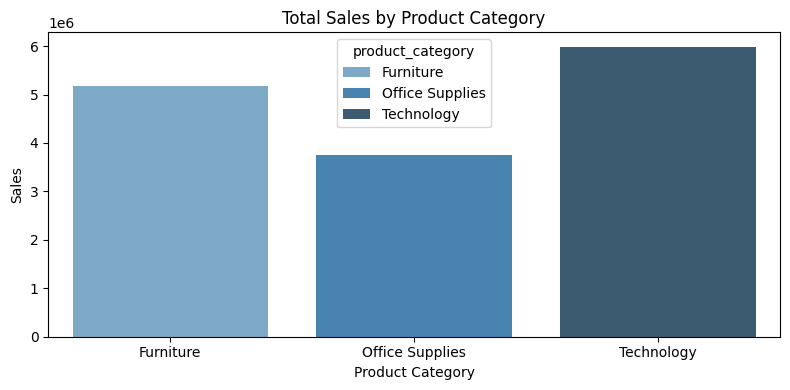

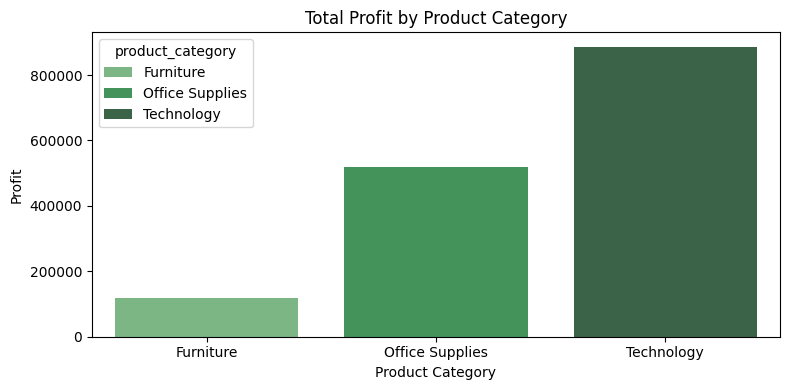

In [2]:
# Aggregate by category
category_summary = df.groupby('product_category')[['sales', 'profit']].sum().reset_index()

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(data=category_summary, x='product_category', y='sales', hue='product_category', palette='Blues_d', legend='full')
plt.title('Total Sales by Product Category')
plt.ylabel('Sales')
plt.xlabel('Product Category')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
sns.barplot(data=category_summary, x='product_category', y='profit', hue='product_category', palette='Greens_d', legend='full')
plt.title('Total Profit by Product Category')
plt.ylabel('Profit')
plt.xlabel('Product Category')
plt.tight_layout()
plt.show()

### üìö Step 3: Sales & Profit by Sub-Category

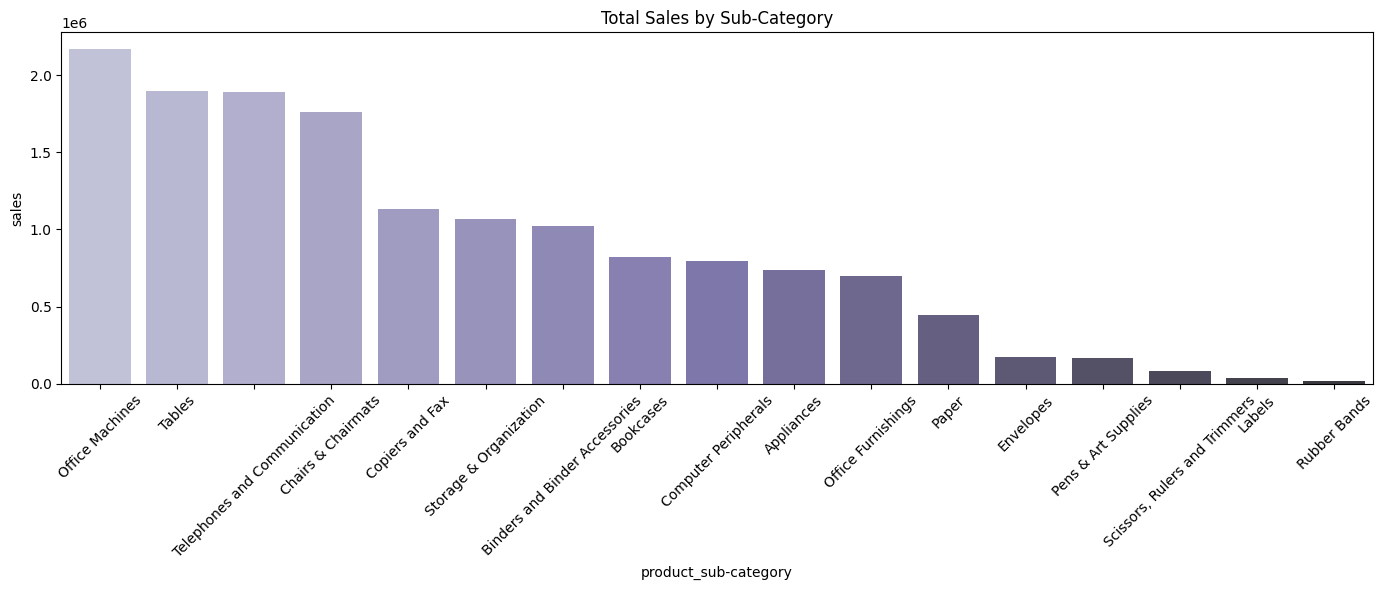

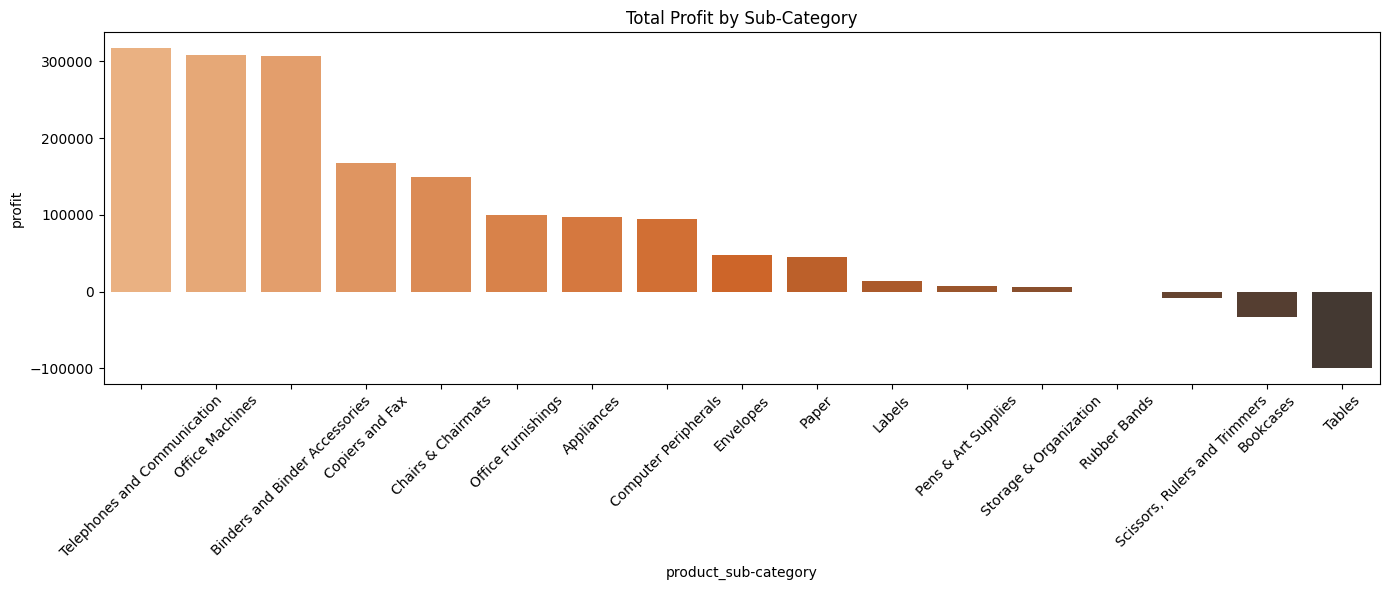

In [3]:
subcategory_summary = df.groupby('product_sub-category')[['sales', 'profit']].sum().sort_values(by='sales', ascending=False).reset_index()

# Plot Sales by Sub-Category
plt.figure(figsize=(14, 6))
sns.barplot(data=subcategory_summary, x='product_sub-category', y='sales', hue='product_sub-category', palette='Purples_d')
plt.title('Total Sales by Sub-Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Profit by Sub-Category
subcategory_summary = subcategory_summary.sort_values(by='profit', ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(data=subcategory_summary, x='product_sub-category', y='profit', hue='product_sub-category', palette='Oranges_d')
plt.title('Total Profit by Sub-Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### üîç Step 4: Top & Bottom Products by Profit

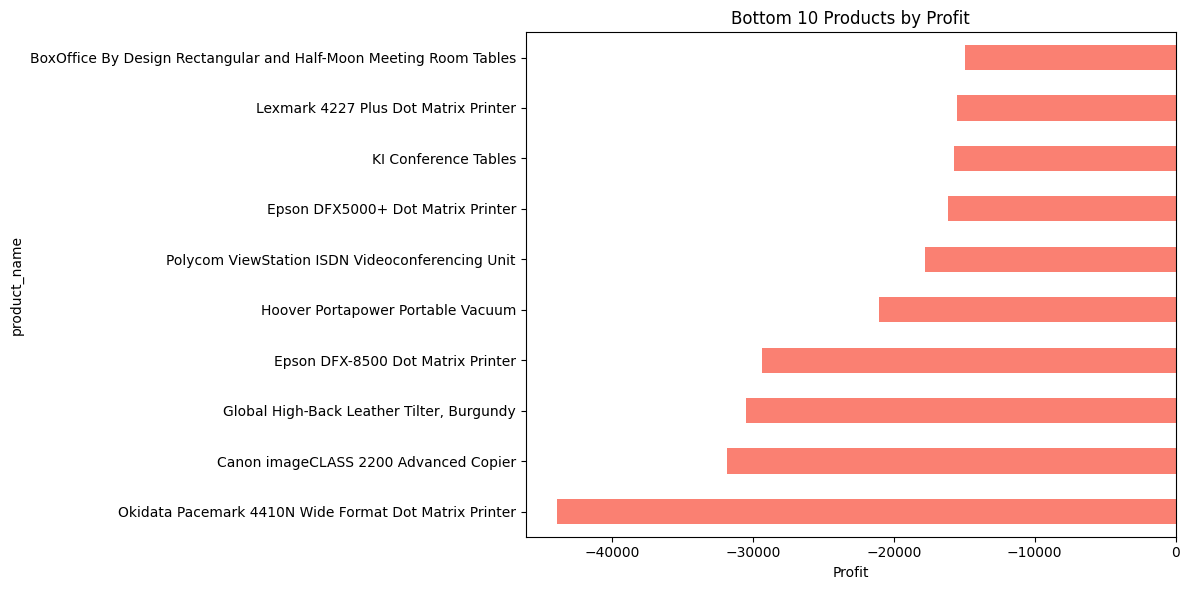

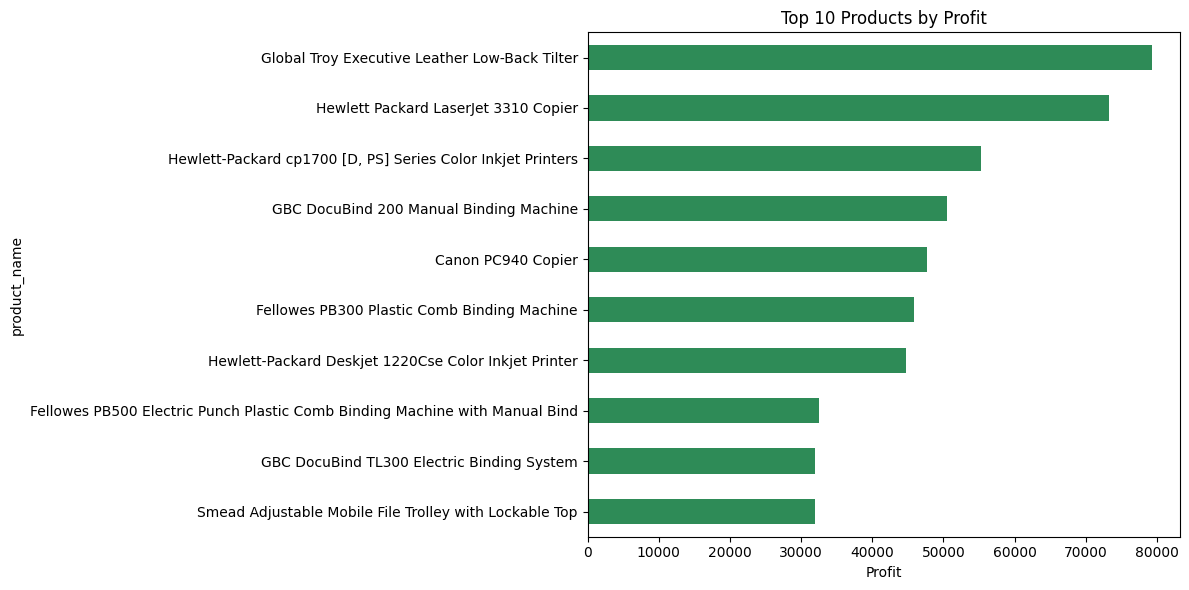

In [14]:
df['product_name'] = df['product_name'].str.encode('ascii', 'ignore').str.decode('ascii')

# Aggregate at product level
product_profit = df.groupby('product_name')['profit'].sum().sort_values()

# Bottom 10 Loss-Making Products
plt.figure(figsize=(12, 6))
product_profit.head(10).plot(kind='barh', color='salmon')
plt.title('Bottom 10 Products by Profit')
plt.xlabel('Profit')
plt.tight_layout()
plt.show()

# Top 10 Profitable Products
plt.figure(figsize=(12, 6))
product_profit.tail(10).plot(kind='barh', color='seagreen')
plt.title('Top 10 Products by Profit')
plt.xlabel('Profit')
plt.tight_layout()
plt.show()

## ‚úÖ Summary of Day 4
- Aggregated sales and profit at the product level
- Identified top and bottom 10 products by profitability
- Visualized profit trends with horizontal bar charts

üöÄ Ready to move to Day 5: Advanced Product Insights & Recommendations!